In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Path to the masks folder
mask_dir = "/home/calculon/0Datasets/fuseg/original/train/labels"      # original dataset path

# Fixed sizes
fixed_sizes = [64, 128, 192, 256]

# Lists for storing results
real_sizes = []   # (width, height)
fixed_classes = []  # 64, 128, 192, 256

# Browse the images in the folder
for filename in os.listdir(mask_dir):
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    path = os.path.join(mask_dir, filename)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        continue

    # Find white pixels (object)
    coords = cv2.findNonZero(mask)
    if coords is None:
        continue  # empty image

    # Minimal bounding box
    x, y, w, h = cv2.boundingRect(coords)
    real_sizes.append((w, h))

    # Determine the smallest fixed size that the object can hold
    max_side = max(w, h)
    for size in fixed_sizes:
        if max_side <= size:
            fixed_classes.append(size)
            break
    else:
        fixed_classes.append('>256')  # if you exceed all




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


≤ 64×64: 348 objects
128×128: 238 objects
256×256: 178 objects
>256×256: 27 objects



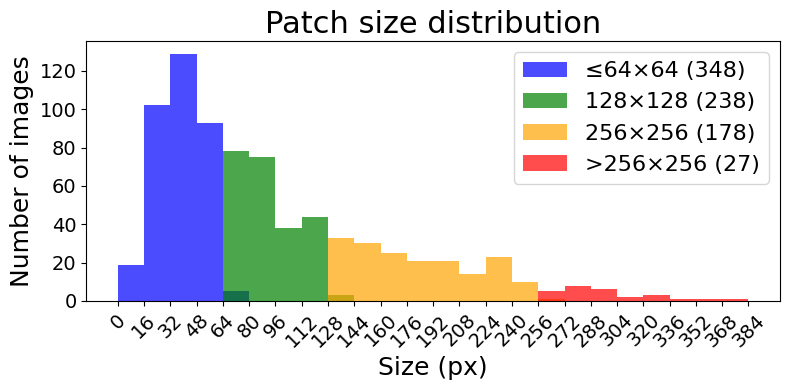

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Histogram 2: Actual sizes (custom ranges and labels)
# -------------------------

limit_values = [64,128,256,384]

max_sides = np.array([max(w, h) for w, h in real_sizes])

bins = np.arange(0, 400, 16)  # 0, 16, 32, ..., 512

# Band masks
mask_small = max_sides <= limit_values[0]
mask_medium = (max_sides > limit_values[0]) & (max_sides <= limit_values[1])
mask_large = (max_sides > limit_values[1]) & (max_sides <= limit_values[2])
mask_xlarge = max_sides > limit_values[2]

# Counts
count_small  = np.sum(mask_small)
count_medium = np.sum(mask_medium)
count_large  = np.sum(mask_large)
count_xlarge = np.sum(mask_xlarge)

# ----Print to terminal ----
print(f"≤ {limit_values[0]}×{limit_values[0]}: {count_small} objects")
print(f"{limit_values[1]}×{limit_values[1]}: {count_medium} objects")
print(f"{limit_values[2]}×{limit_values[2]}: {count_large} objects")
print(f">{limit_values[2]}×{limit_values[2]}: {count_xlarge} objects\n")

# ----Plot histogram ----
plt.figure(figsize=(8,4))

plt.hist(max_sides[mask_small], bins=bins, color='blue', alpha=0.7, label=f'≤{limit_values[0]}×{limit_values[0]} ({count_small})')
plt.hist(max_sides[mask_medium], bins=bins, color='green', alpha=0.7, label=f'{limit_values[1]}×{limit_values[1]} ({count_medium})')
plt.hist(max_sides[mask_large], bins=bins, color='orange', alpha=0.7, label=f'{limit_values[2]}×{limit_values[2]} ({count_large})')
plt.hist(max_sides[mask_xlarge], bins=bins, color='red', alpha=0.7, label=f'>{limit_values[2]}×{limit_values[2]} ({count_xlarge})')

plt.title("Patch size distribution", fontsize=22)
plt.xlabel("Size (px)", fontsize=18)
plt.ylabel("Number of images", fontsize=18)
plt.xticks(bins, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('patch_sizes.eps')
plt.show()

